The following example shows how to log data for training. The log data will be saved into data/training folder

In [1]:
# %matplotlib tk
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import manager
import drone.trajectory
import drone.disturbance_model

plt.rcParams['figure.figsize'] = [15, 9]

wall_distance = 0.5
wind_speed_x = -12.0
wind_speed_y = 0.0
wind_speed_z = -12.0

sim_test = manager.Manager()
model = drone.disturbance_model.WindEffectNearWall(wall_origin=np.array([-wall_distance, 0, 0]), 
                                                    u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
trajectory = drone.trajectory.Figure8(10)
sim_test.set_up(disturbance_model=model, trajectory=trajectory)

sim_test.run(10.0) 

[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_with_trail_refine.yaml
is_sinusoidal_wind:  False
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
phi net input output fields:
input {'position': [0, 1, 2], 'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'omega': [0, 1, 2], 'f_ctrl_input': [2], 'torque_ctrl_input': [0, 1, 2], 'rotor_0_rotation_spd': None, 'rotor_1_rotation_spd': None, 'rotor_2_rotation_spd': None, 'rotor_3_rotation_spd': None}
label {'f_disturb': [0, 1, 2]}
simple net input output fields:
input {'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'omega': [0, 1, 2], 'rotor_0_l

x-z plane projection of the tracking result

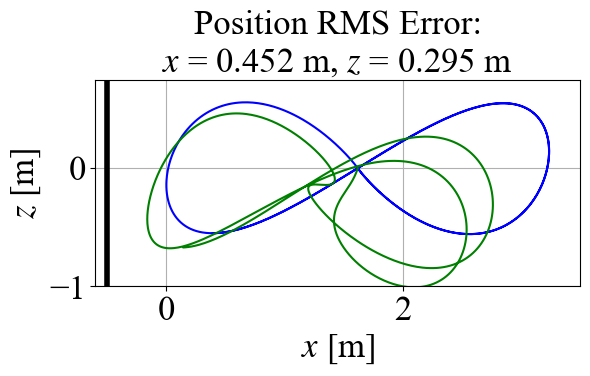

In [2]:
import matplotlib.pyplot as plt
def plot_2d_xz_trace(logger: np.ndarray, wind_speed_x=0.0, wind_speed_y=0.0, wind_speed_z=-3.0, wall_x: float = 0.0):
    # Set publication-quality font settings
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "stix"
    rms_x = np.sqrt(np.mean(np.square(logger["e_x"][:, 0])))
    rms_z = np.sqrt(np.mean(np.square(logger["e_x"][:, 2])))



    fig, ax = plt.subplots(figsize=(6, 4))  # Width x Height in inches

    # Desired trajectory in x-z plane
    ax.plot(logger["x_d"][:, 0],
            -logger["x_d"][:, 2], 'b-', label='Desired Trajectory')

    # Actual drone trace in x-z plane
    ax.plot(logger["position"][:, 0],
            -logger["position"][:, 2], 'g-', label='Drone Trace')

    # Vertical black line to represent wall
    ax.axvline(x=wall_x, color='k', linestyle='-', linewidth=4.0, label='Wall Surface')

    # LaTeX-style title including wind vector
    title_1 = rf"Position RMS Error:"
    title_2 = rf"$x$ = {rms_x:.3f} m, $z$ = {rms_z:.3f} m"
    ax.set_title(title_1 + "\n" + title_2, fontsize=25)


    ax.set_xlabel(r"$x$ [m]", fontsize=25)
    ax.set_ylabel(r"$z$ [m]", fontsize=25)
    plt.tick_params(labelsize=25)  # Applies to current figure or axes

#     ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    ax.set_xlim(-0.6, 3.5)
    ax.set_ylim(-1, 0.75)

    plt.tight_layout()
    plt.show()
    return fig

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
# Usage
fig = plot_2d_xz_trace(sim_test.logger.output, wind_speed_x, wind_speed_y, wind_speed_z, -0.5)
filename = f"no_est_no_bemt_w{int(wind_speed_x)}_{int(wind_speed_z)}_.pdf"
fig.savefig(filename, dpi=300, bbox_inches='tight')



Generate the legends separately. 

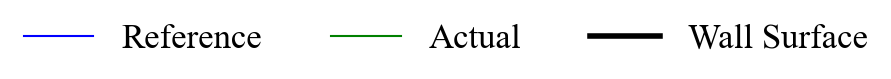

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1, 0.5))
ax.plot([], [], 'b-', label='Reference')
ax.plot([], [], 'g-', label='Actual')
ax.plot([], [], 'k-', label='Wall Surface',  linewidth=4.0)
ax.axis('off')
ax.legend(loc='center', ncol=3, frameon=False, fontsize=25)
fig.savefig("legend.pdf", bbox_inches='tight', dpi=300)
